In [64]:
%matplotlib inline
import random
import numpy as np
np.random.seed(seed=1337)
max_weight = 3
n_items = 16
max_value = (2**n_items) 
weights =  np.random.rand(n_items)
values = np.random.rand(n_items)

In [31]:
from numba import njit,prange
@njit()
def encodeNumber(number,bits=n_items):
    return np.array([bool(number & (1<<(bits-1-x))) for x in prange(bits)])

In [32]:
@njit()
def scoreFunction(mask, weights=weights,values=values,max_weight=max_weight,max_value=max_value):
    final_weight = 0
    score = 0 
    for i in prange(weights.size):
        if mask[i]:
            final_weight+=weights[i]
            score+=values[i]
    return -1 if final_weight > max_weight else score

In [33]:
@njit(parallel=True)
def getData():
    return np.array([scoreFunction(encodeNumber(x)) for x in prange(2**n_items)])
%time data = getData()

Wall time: 666 ms


In [36]:
np.array([encodeNumber(x) for x in prange(2**n_items)])

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True, False],
       ...,
       [ True,  True,  True, ...,  True, False,  True],
       [ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True,  True]])

In [21]:
max(data)

4.996682595542677

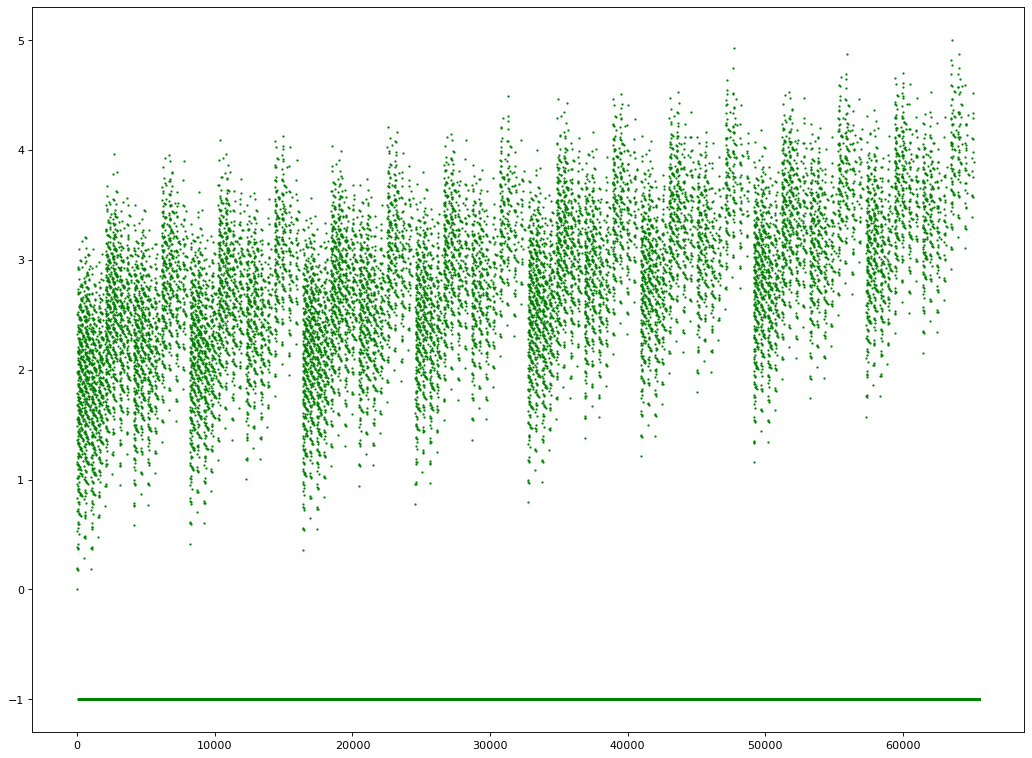

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 12), dpi=80) 
plt.scatter(range(len(data)), data,color="g",s=1)
# plt.ylabel('scores')
plt.show()

In [38]:
encoded = np.array([encodeNumber(x) for x in prange(2**n_items)])

In [116]:
from sklearn.neighbors import kneighbors_graph
encoded_graph = kneighbors_graph(encoded, 1, mode='connectivity', include_self=True, metric ="hamming")

In [117]:
import matplotlib.pyplot as plt
import networkx as nx
encoded_graph_networkx = nx.from_scipy_sparse_matrix(encoded_graph)  

In [118]:
from numba import vectorize, float64
from numba.types import Array
@vectorize([float64(float64)])
def getSizes(score):
    return score*10 +15
@njit()
def getColor(score): # return vector and cannot vectorize
    normalized_score = (1+score)/6
    return np.array([(1-normalized_score),normalized_score,0, 0.5 if score == -1 else 1])

In [119]:
node_size = getSizes(data)

In [120]:
node_color = np.array([getColor(x) for x in data])

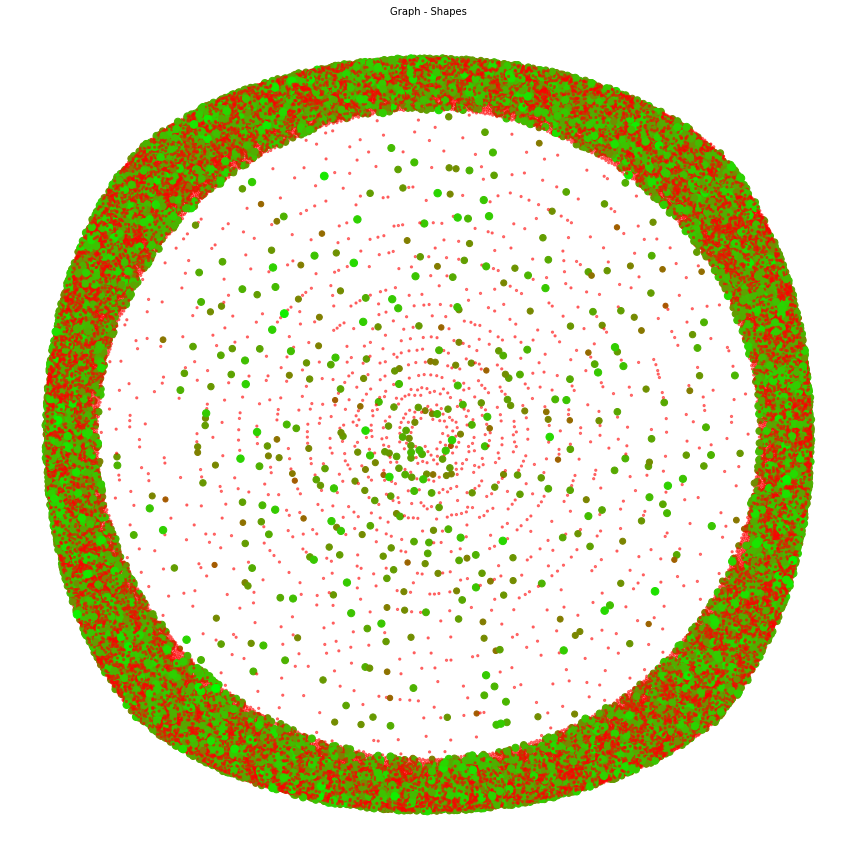

In [121]:
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(111)
ax.set_title('Graph - Shapes', fontsize=10)
nx.draw(encoded_graph_networkx,node_size=node_size,node_color=node_color) 
plt.tight_layout()
plt.savefig("GraphEncoded.png", dpi=300, bbox_inches='tight')

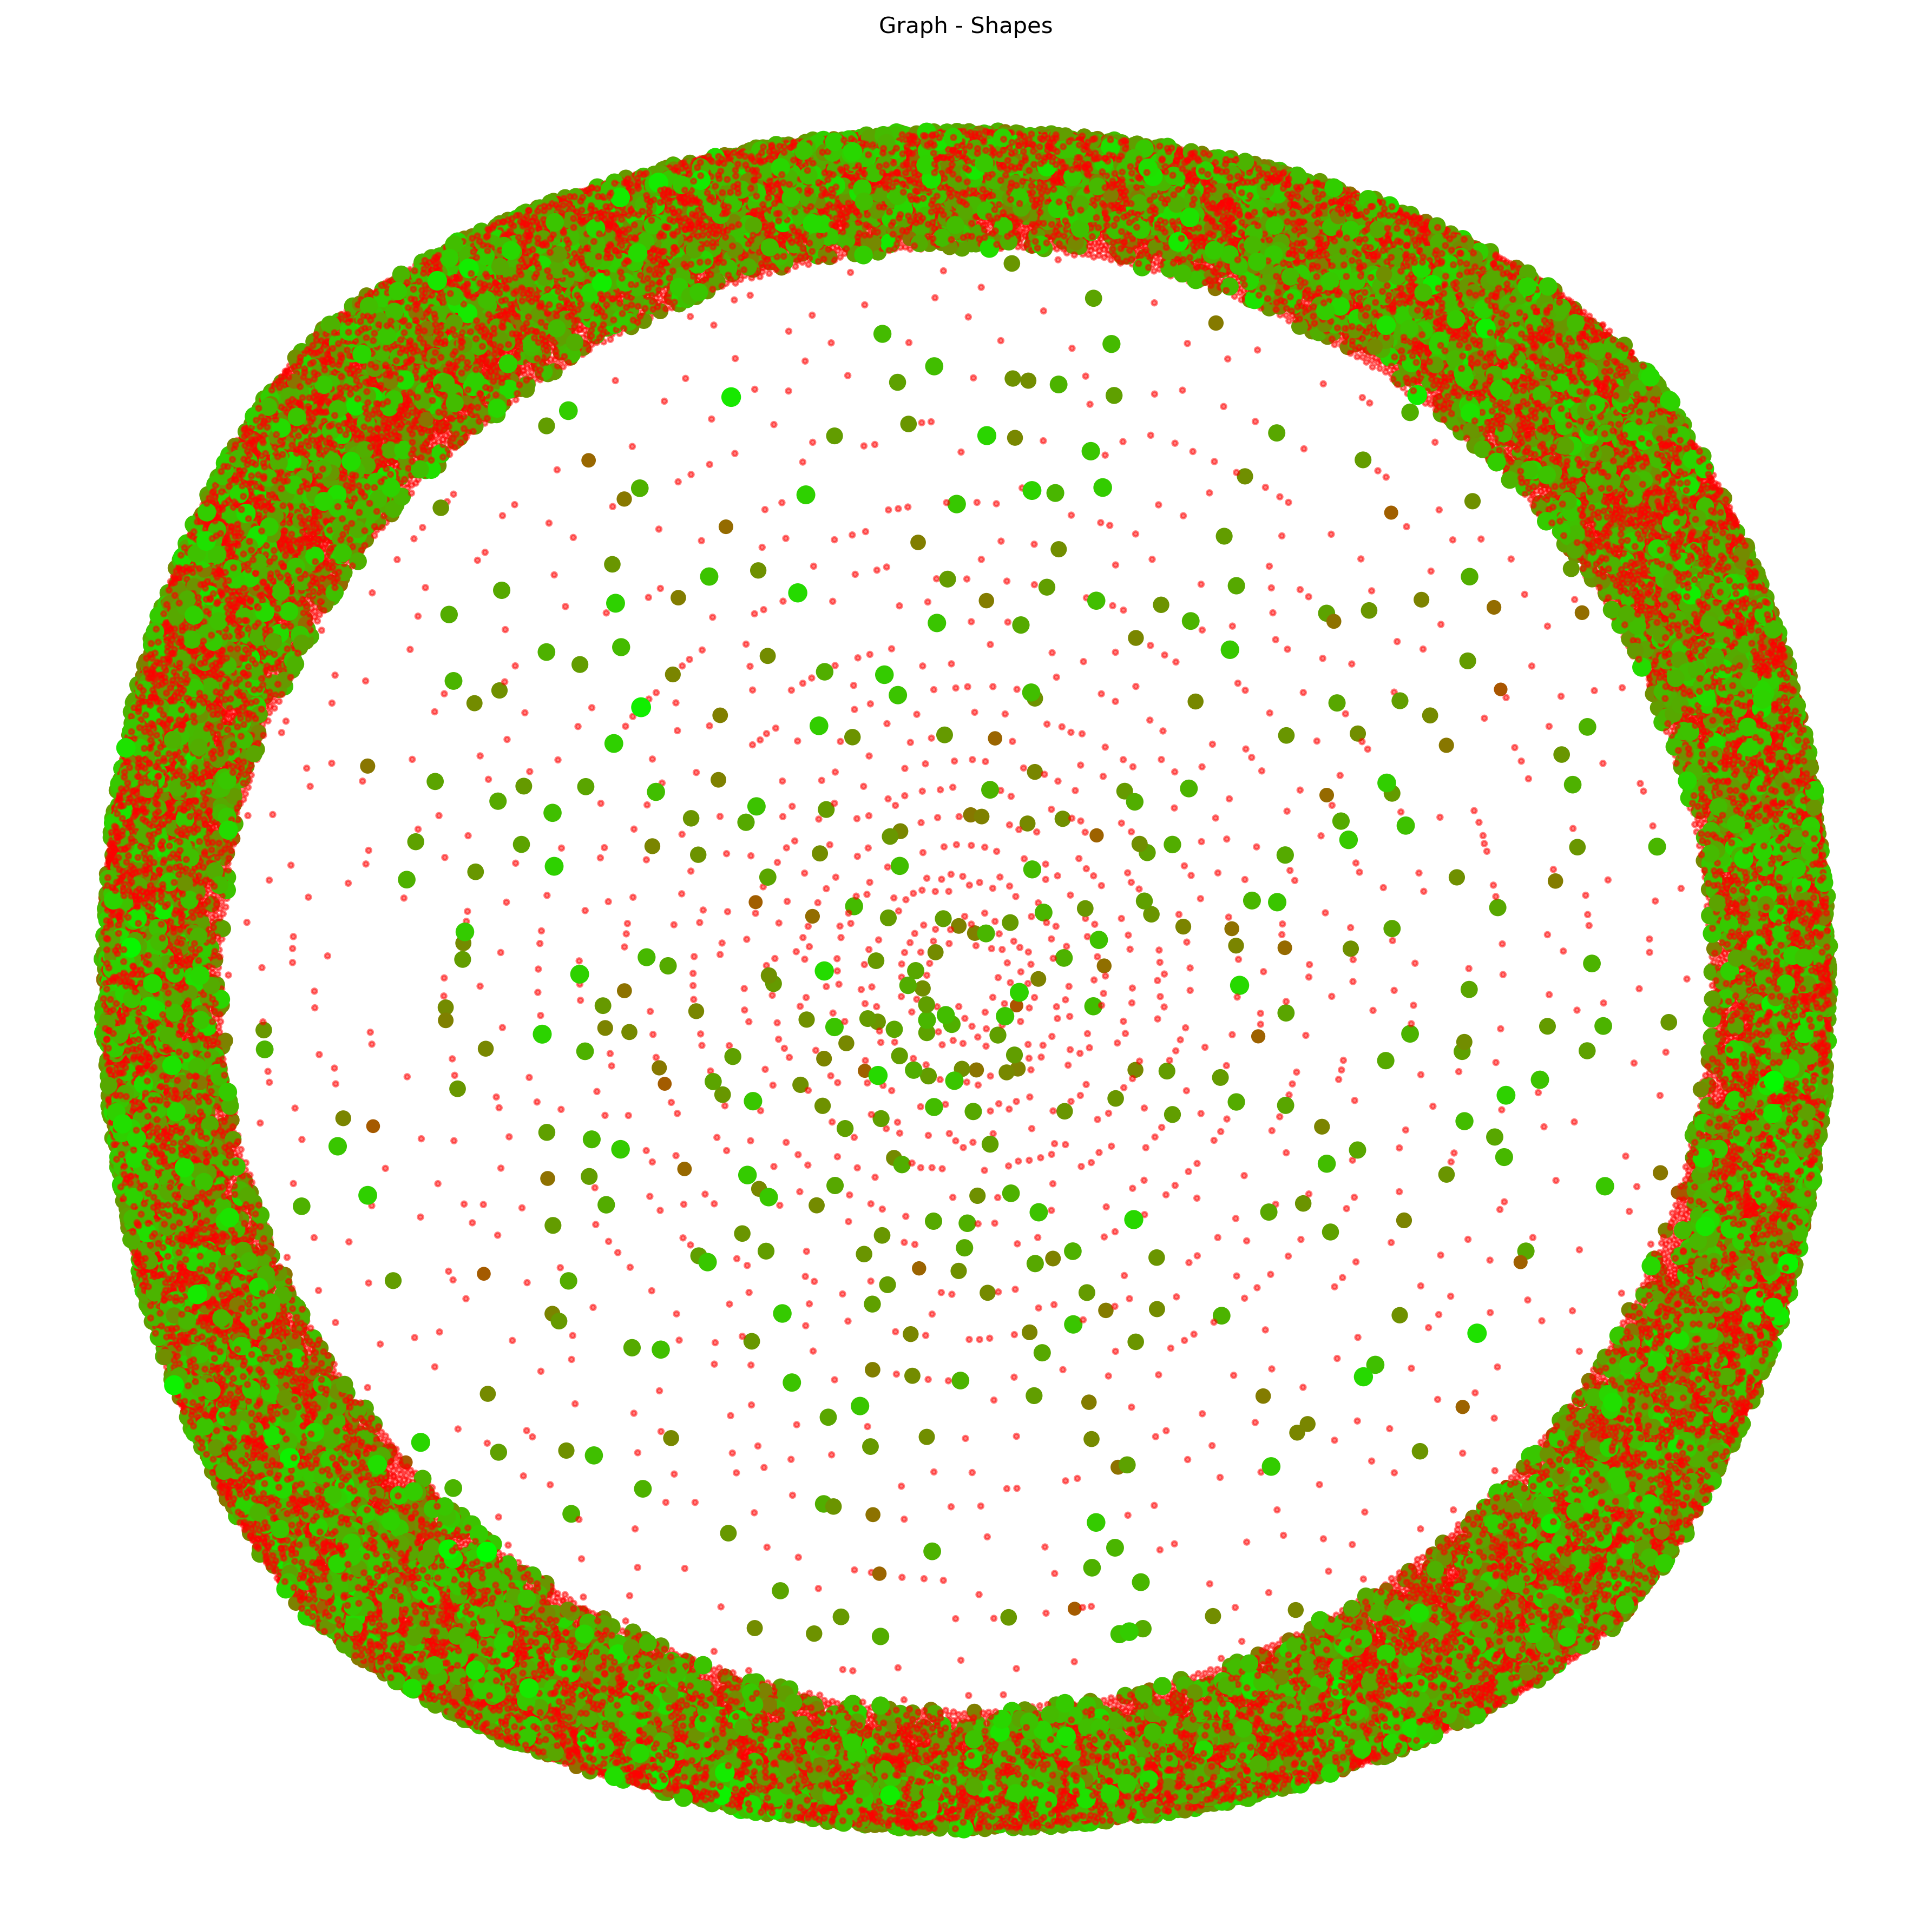

In [130]:
from IPython.display import Image
Image("img/GraphEncoded.png")